<a href="https://colab.research.google.com/github/ShrishChou/TennisShotDetection/blob/main/Tennis_Stroke_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Creating a simple neural network to train sot setection model


In [103]:
import torch
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [104]:
import requests
import zipfile
from pathlib import Path
data_path=Path("data/")
image_path=data_path / "shots"
if image_path.is_dir():
  print(f"{image_path} already exists")
else:
  print(f"{image_path} is being created")
  image_path.mkdir(parents=True,exist_ok=True)

with open(data_path / "shots.zip","wb") as f:
  request = requests.get("https://github.com/ShrishChou/TennisShotDetection/raw/main/data/shots.zip")
  print("Downloading")
  f.write(request.content)

with zipfile.ZipFile(data_path / "shots.zip","r") as zip_ref:
  print("unzipping")
  zip_ref.extractall(image_path)

data/shots already exists
Downloading
unzipping


In [105]:
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dir_path}")

In [106]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/shots
There are 3 directories and 0 images in data/shots
There are 0 directories and 25 images in data/shots
There are 0 directories and 25 images in data/shots
There are 0 directories and 25 images in data/shots
There are 3 directories and 0 images in data/shots
There are 0 directories and 75 images in data/shots
There are 0 directories and 75 images in data/shots
There are 0 directories and 75 images in data/shots


In [107]:
train_dir=image_path/"train"
test_dir=image_path/"test"

backhand
Random image path: data/shots/train/backhand/main-qimg-63e0799aeb78af4ab3878bbeceb6a703-lq.jpg
Image class: backhand
Image height: 396
Image width: 594


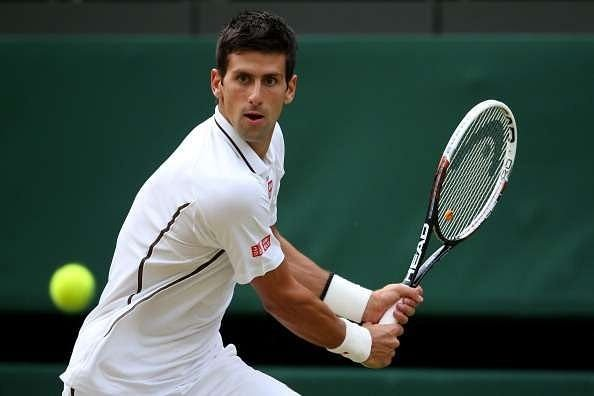

In [108]:

import random
from PIL import Image

image_path_list=list(image_path.glob("*/*/*.jpg"))

random_image_path=random.choice(image_path_list)
image_class=random_image_path.parent.stem
print(image_class)
img=Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

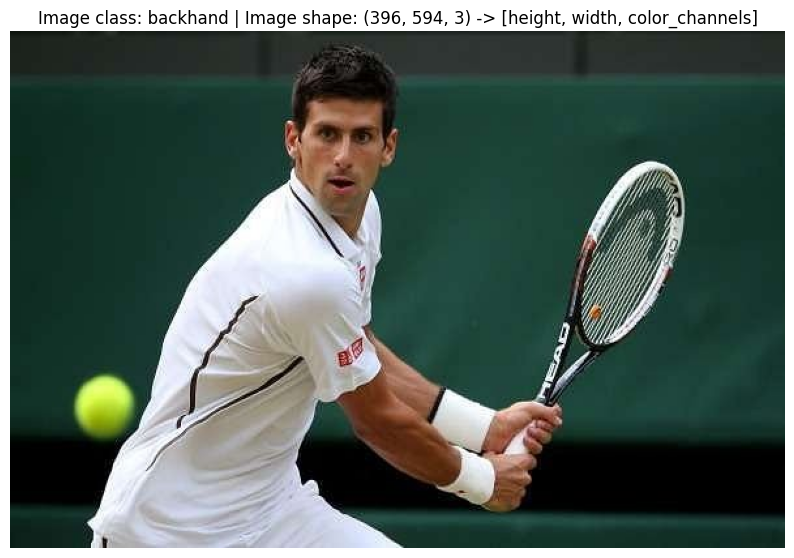

In [109]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array=np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);


In [110]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform= transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

data_transform(img)

tensor([[[0.1333, 0.1333, 0.1373,  ..., 0.0902, 0.0863, 0.0824],
         [0.1490, 0.1490, 0.1490,  ..., 0.1137, 0.1098, 0.1059],
         [0.1490, 0.1490, 0.1529,  ..., 0.1137, 0.1098, 0.1059],
         ...,
         [0.0863, 0.0824, 0.0824,  ..., 0.0549, 0.0510, 0.0471],
         [0.0588, 0.0627, 0.0667,  ..., 0.0510, 0.0510, 0.0431],
         [0.0588, 0.0588, 0.0627,  ..., 0.0510, 0.0510, 0.0431]],

        [[0.1608, 0.1608, 0.1608,  ..., 0.1176, 0.1137, 0.1098],
         [0.1765, 0.1765, 0.1765,  ..., 0.1412, 0.1373, 0.1333],
         [0.1765, 0.1725, 0.1765,  ..., 0.1412, 0.1373, 0.1333],
         ...,
         [0.2039, 0.2039, 0.2039,  ..., 0.1451, 0.1373, 0.1333],
         [0.1647, 0.1647, 0.1686,  ..., 0.1333, 0.1333, 0.1255],
         [0.1608, 0.1608, 0.1647,  ..., 0.1333, 0.1333, 0.1255]],

        [[0.1333, 0.1373, 0.1490,  ..., 0.0902, 0.0863, 0.0824],
         [0.1490, 0.1529, 0.1647,  ..., 0.1137, 0.1098, 0.1059],
         [0.1569, 0.1569, 0.1686,  ..., 0.1137, 0.1098, 0.

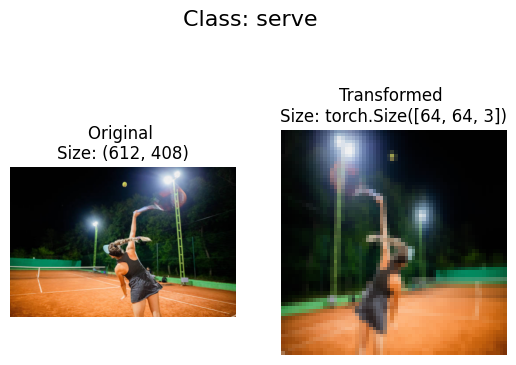

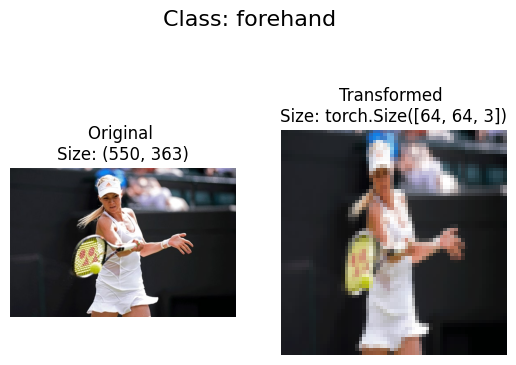

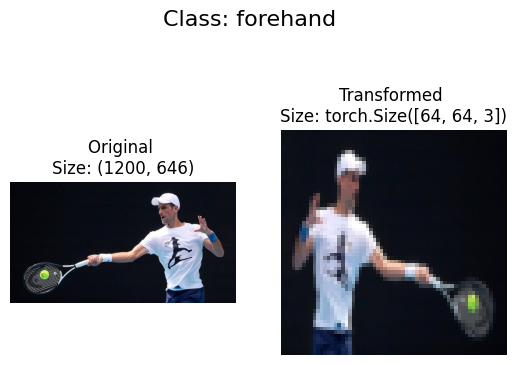

In [111]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [112]:
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,
                                transform=data_transform,
                                target_transform=None)
test_data=datasets.ImageFolder(root=test_dir,
                               transform=data_transform)
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/shots/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/shots/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [113]:
class_names = train_data.classes
class_dict = train_data.class_to_idx

In [114]:
len(train_data), len(test_data)

(225, 75)

In [115]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.2824, 0.2784, 0.2784,  ..., 0.3765, 0.3765, 0.3843],
         [0.2667, 0.2706, 0.2784,  ..., 0.3647, 0.3804, 0.3843],
         [0.2706, 0.2784, 0.2784,  ..., 0.3569, 0.3882, 0.4000],
         ...,
         [0.3216, 0.3255, 0.3294,  ..., 0.4784, 0.4863, 0.4902],
         [0.3216, 0.3255, 0.3373,  ..., 0.4745, 0.4824, 0.4902],
         [0.3373, 0.3490, 0.3490,  ..., 0.4745, 0.4902, 0.5020]],

        [[0.5176, 0.5137, 0.5176,  ..., 0.5686, 0.5647, 0.5725],
         [0.5098, 0.5098, 0.5176,  ..., 0.5686, 0.5725, 0.5804],
         [0.5098, 0.5176, 0.5176,  ..., 0.5647, 0.5765, 0.5882],
         ...,
         [0.5451, 0.5529, 0.5569,  ..., 0.6510, 0.6510, 0.6588],
         [0.5529, 0.5529, 0.5608,  ..., 0.6471, 0.6471, 0.6588],
         [0.5608, 0.5686, 0.5686,  ..., 0.6431, 0.6510, 0.6627]],

        [[0.8314, 0.8314, 0.8353,  ..., 0.8353, 0.8431, 0.8431],
         [0.8196, 0.8275, 0.8353,  ..., 0.8353, 0.8392, 0.8392],
         [0.8235, 0.8314, 0.8353,  ..., 0.83

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


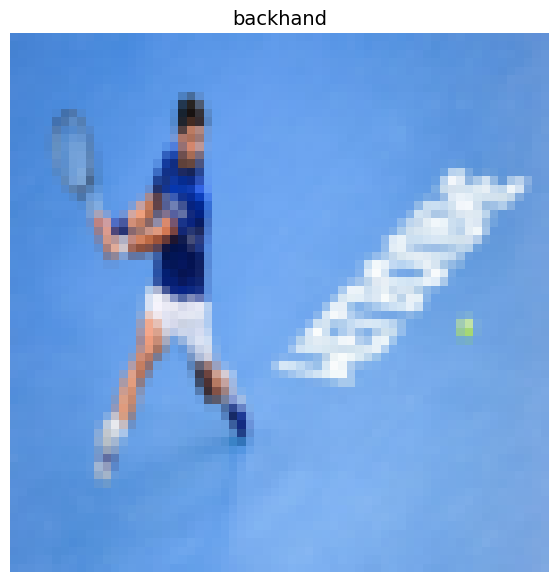

In [116]:
img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);


In [117]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 240, 240]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


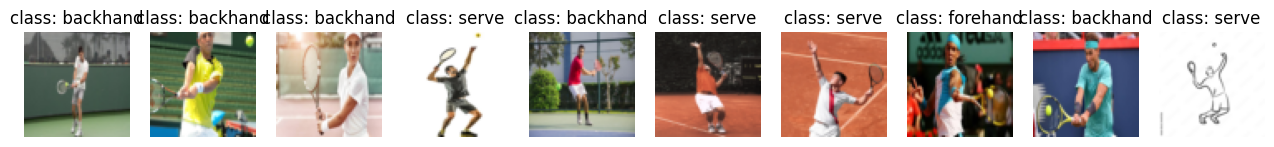

In [118]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")


    random_samples_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16, 8))

    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        targ_image_adjust = targ_image.permute(1, 2, 0)
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)
display_random_images(train_data,
                      n=12,
                      classes=class_names,
                      seed=None)

In [119]:
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            num_workers=1,
                            shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            num_workers=1,
                            shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b271187c100>,
 <torch.utils.data.dataloader.DataLoader at 0x7b271087a050>)

In [120]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [121]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7b270280dea0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b270280f070>)

In [122]:
class TinyVGG(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


In [123]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [124]:
img_batch, label_batch = next(iter(train_dataloader_simple))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0723, 0.0681, 0.0412]])

Output prediction probabilities:
tensor([[0.3373, 0.3358, 0.3269]])

Output prediction label:
tensor([0])

Actual label:
2


In [125]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [126]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [127]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [128]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS = 200
model_0 = TinyVGG(input_shape=3,
                  hidden_units=8,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)
from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):

    loss = results['train_loss']
    test_loss = results['test_loss']
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']
    epochs = range(len(results['train_loss']))
    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();
plot_loss_curves(model_0_results)


#Transfer Learning
### Due to the low accuracy, switched to transfer learning to attempt higher accuracy

In [150]:
import torch
import torchvision

In [151]:
import matplotlib.pyplot as plt
import torch
import torchvision

from torch import nn
from torchvision import transforms

try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary


In [152]:
import requests
import zipfile
from pathlib import Path
data_path=Path("data/")
image_path=data_path / "shots"
if image_path.is_dir():
  print(f"{image_path} already exists")
else:
  print(f"{image_path} is being created")
  image_path.mkdir(parents=True,exist_ok=True)

with open(data_path / "shots.zip","wb") as f:
  request = requests.get("https://github.com/ShrishChou/TennisShotDetection/raw/main/data/shots.zip")
  print("Downloading")
  f.write(request.content)

with zipfile.ZipFile(data_path / "shots.zip","r") as zip_ref:
  print("unzipping")
  zip_ref.extractall(image_path)

data/shots already exists
Downloading
unzipping


In [153]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [154]:
print(f"{image_path} directory exists.")

data/shots directory exists.


In [155]:
manual_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [156]:
train_dir=image_path/"train"
test_dir=image_path/"test"

In [157]:
weights = torchvision.models.EfficientNet_B1_Weights.DEFAULT

In [158]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[240]
    resize_size=[255]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [159]:
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=32) # set mini-batch size to 32

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x7b26fffb3700>,
 ['backhand', 'forehand', 'serve'])

In [ ]:

model = torchvision.models.efficientnet_b1(weights=weights).to(device)
model

In [161]:
for param in model.features.parameters():
    param.requires_grad = False

In [162]:
output_shape = len(class_names)

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=output_shape,
                    bias=True)).to(device)

In [163]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
from timeit import default_timer as timer
start_time = timer()

results = train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=50)

end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

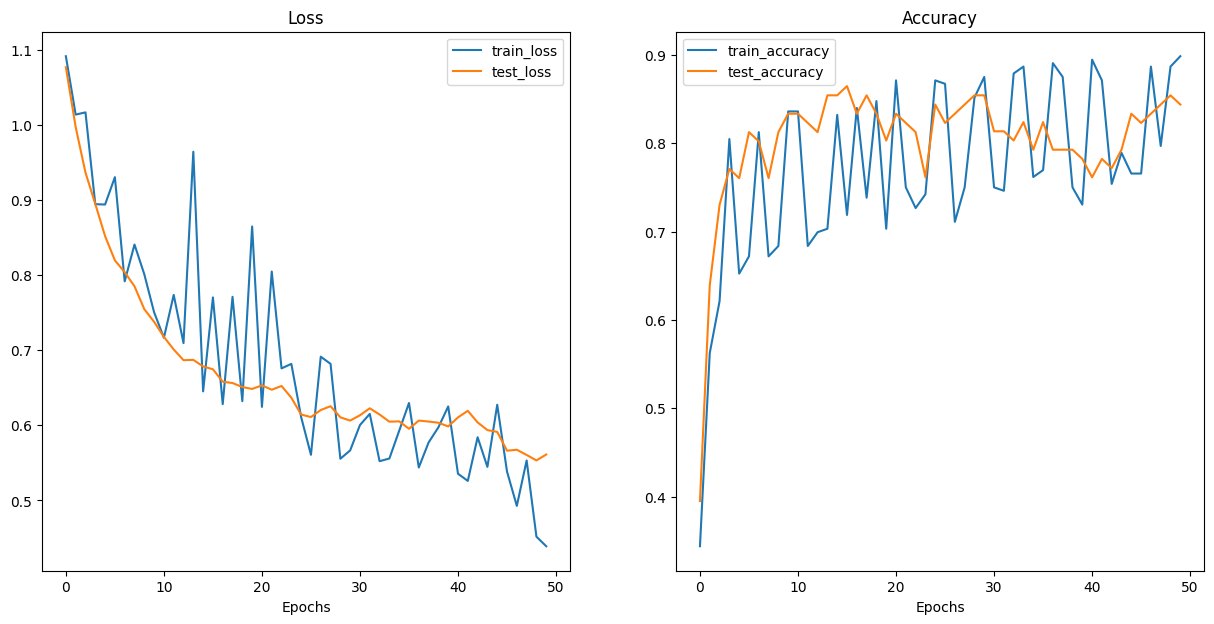

In [147]:
try:
    from helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    with open("helper_functions.py", "wb") as f:
        import requests
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
        f.write(request.content)
    from helper_functions import plot_loss_curves

plot_loss_curves(results)

In [148]:
from typing import List, Tuple

from PIL import Image

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):

    img = Image.open(image_path)

    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])


    model.to(device)
    model.eval()
    with torch.inference_mode():
      transformed_image = image_transform(img).unsqueeze(dim=0)
      target_image_pred = model(transformed_image.to(device))

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

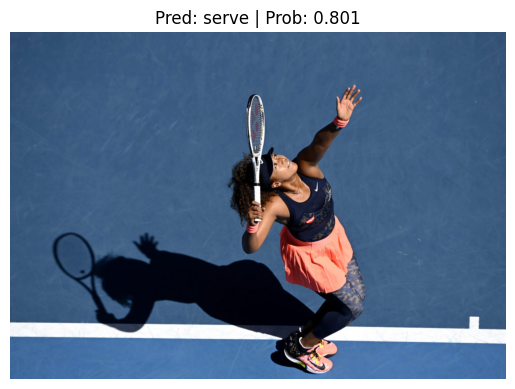

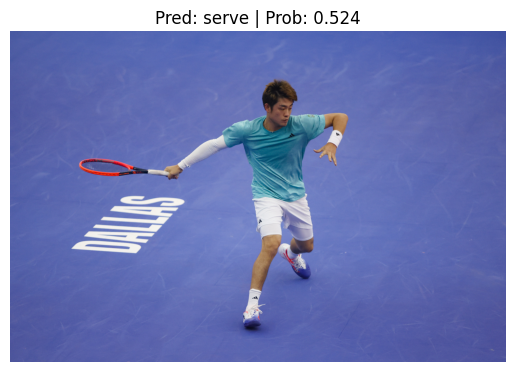

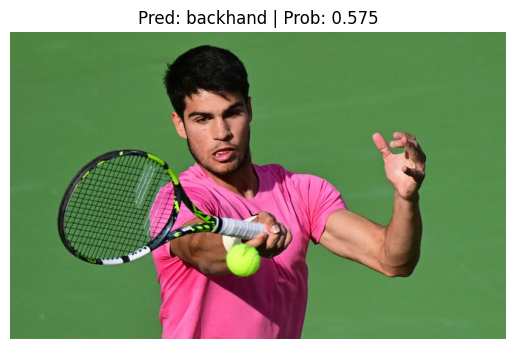

In [149]:
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg"))
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_images_to_plot)

for image_path in test_image_path_sample:
    pred_and_plot_image(model=model,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(224, 224))

#Conclusion
## Overall ended with a 80 percent test accuracy however the wide variety of image types in the data set lead to a complicated training process
### Possible changes
* creating a more comprehensive data set
  * would need more data from pros
* test with different models
